<a href="https://colab.research.google.com/github/neetagt/Data-Analysis-with-Python/blob/main/MedicalDataVisualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('/content/medical_examination.csv')

# 2
BMI = df['weight']/(df['height']/100)**2
df['overweight'] = (BMI > 25).astype(int)


# 3
df[['gluc','cholesterol']] = (df[['gluc','cholesterol']] > 1).astype(int)

# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])


    # 6
    #df_cat = None


    # 7
    fig = sns.catplot(data = df_cat, kind='count',  x='variable', hue='value', col='cardio').set(ylabel = 'total').fig

    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = df[
        ( df['ap_lo'] <= df['ap_hi'] ) &
        ( df['height'] >= df['height'].quantile(0.025) ) &
        ( df['height'] <= df['height'].quantile(0.975) ) &
        ( df['weight'] >= df['weight'].quantile(0.025) ) &
        ( df['weight'] <= df['weight'].quantile(0.975) )
    ]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(corr)



    # 14
    fig, ax = plt.subplots()

    # 15
    ax = sns.heatmap(corr, mask=mask, annot=True, fmt='0.1f', square=True)

    # 16
    fig.savefig('heatmap.png')
    return fig

In [2]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

In [9]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,None
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,None
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,None
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,None
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,None


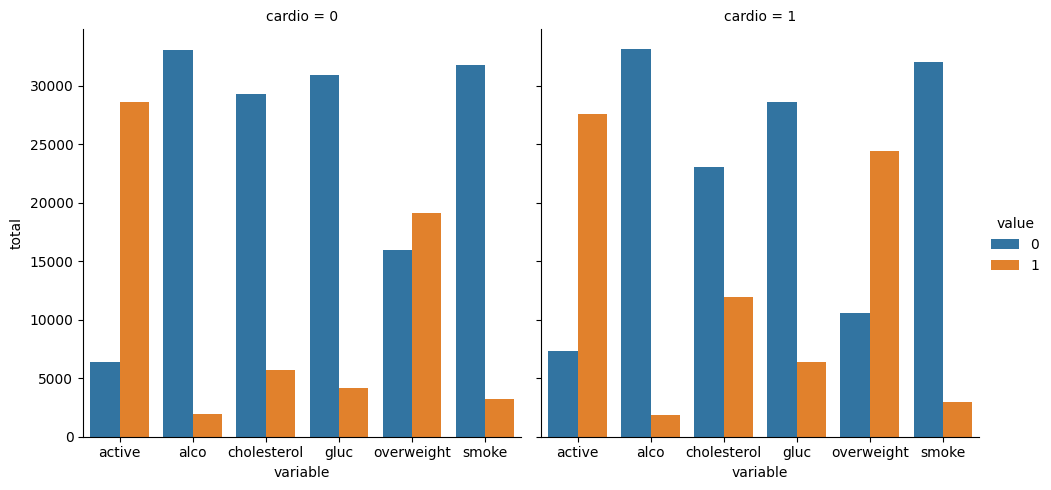

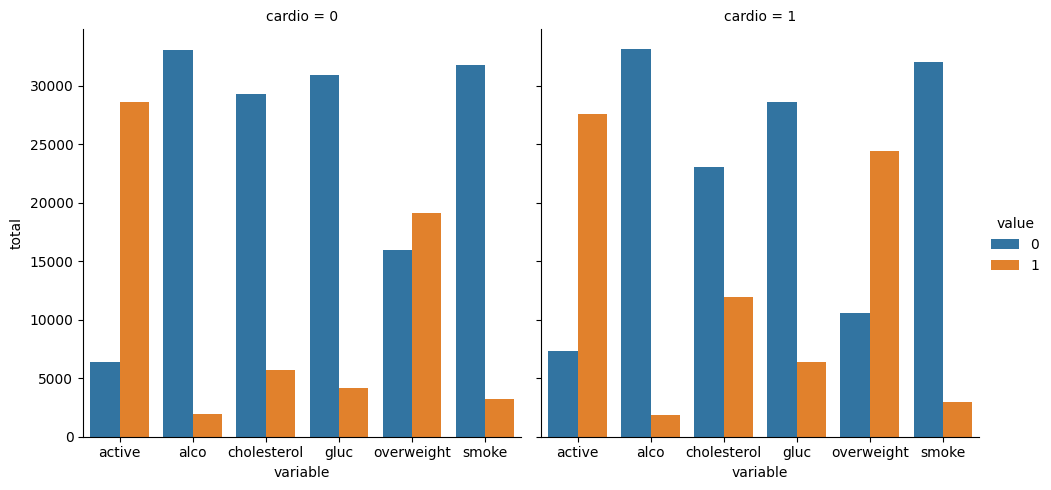

In [13]:
draw_cat_plot()

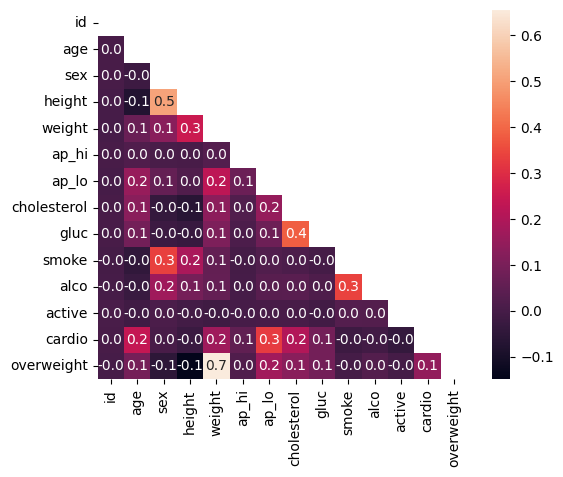

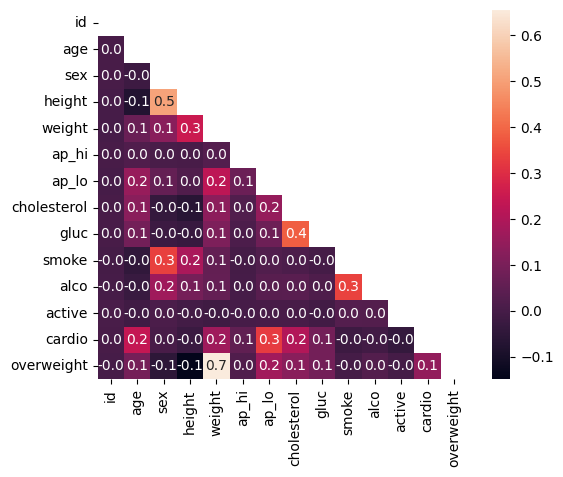

In [14]:
draw_heat_map()